<a href="https://colab.research.google.com/github/dyaccu/Data-Science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [331]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [332]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [333]:
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [334]:
# Correlación
corr = datos.corr()

In [335]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


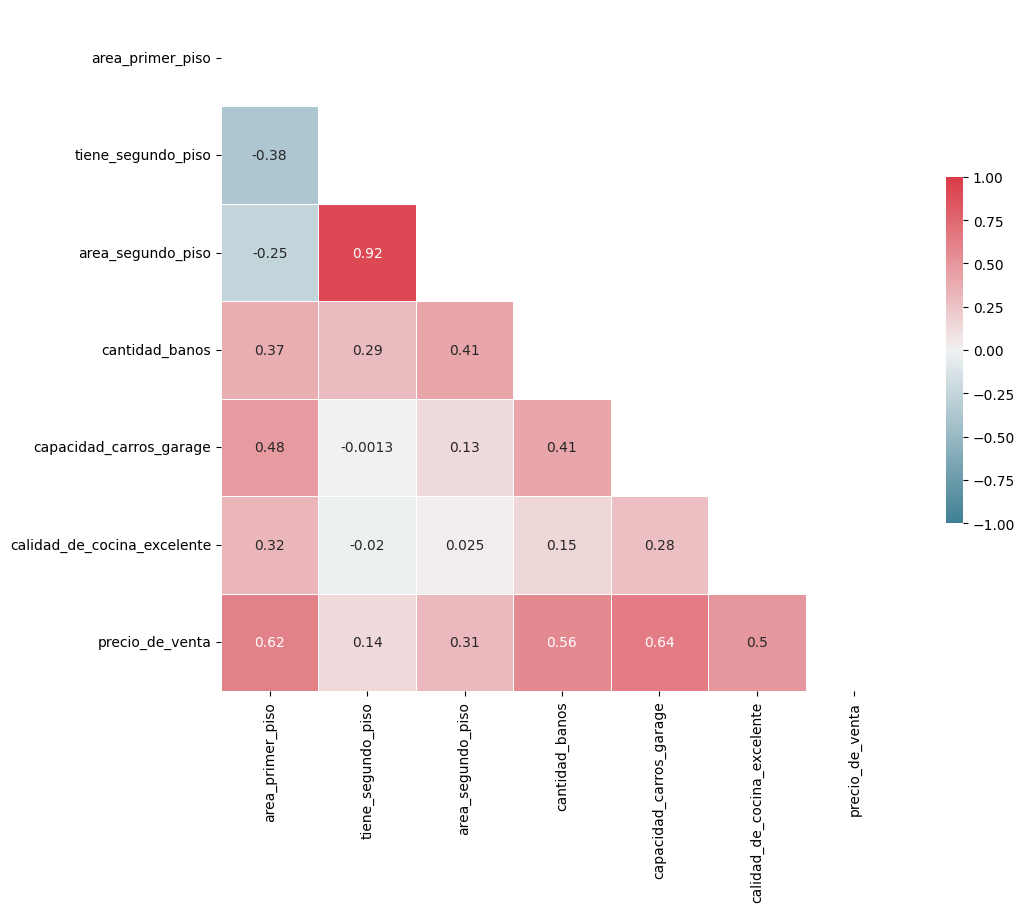

In [336]:
# Actividad
# Cuáles factores están más correlacionados?

# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos1 = pd.read_csv("/content/precios_casas.csv")
datos1 = datos1.drop(columns = "Id")

# Correlación
corr = datos1.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()


## Relacionando variables

In [337]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

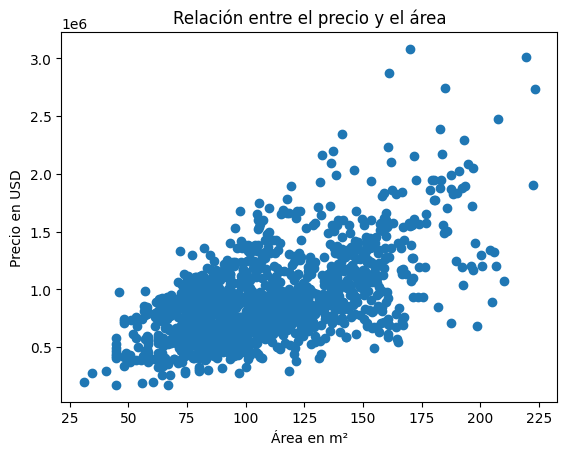

In [338]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.title('Relación entre el precio y el área')
plt.xlabel('Área en m²')
plt.ylabel('Precio en USD')
plt.show()

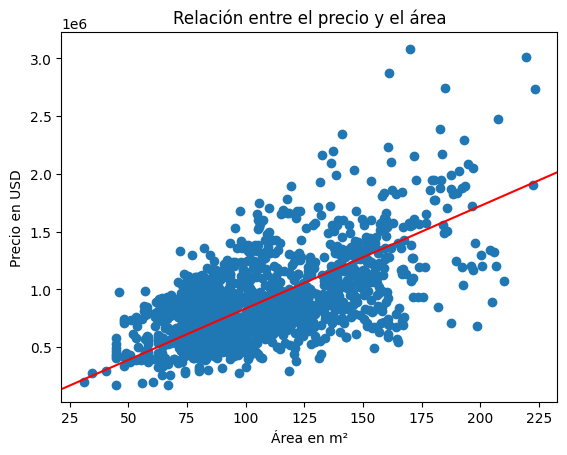

In [339]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')
plt.title('Relación entre el precio y el área')
plt.xlabel('Área en m²')
plt.ylabel('Precio en USD')
plt.show()

## Mejor recta

In [340]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso',y='precio_de_venta',trendline_color_override='red', trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

/tmp/ipython-input-341-3909847005.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




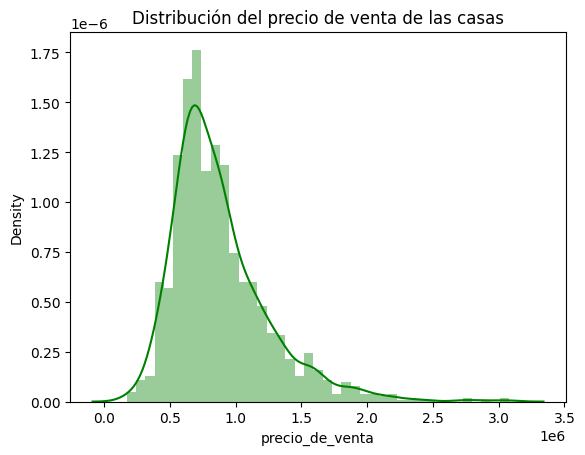

In [341]:
#Quién es nuestra variable de respuesta?
sns.distplot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución del precio de venta de las casas')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [342]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=230) # garantizar la reproductibilidad de la segregación de los datos


In [343]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [344]:
# import ols
from statsmodels.formula.api import ols

In [345]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso',data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [346]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [347]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        15:36:28   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [348]:
# observando el R²
round(modelo_0.rsquared,2)

np.float64(0.38)

## Entendiendo el resíduo

In [349]:
# Quiénes son los residuos?
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


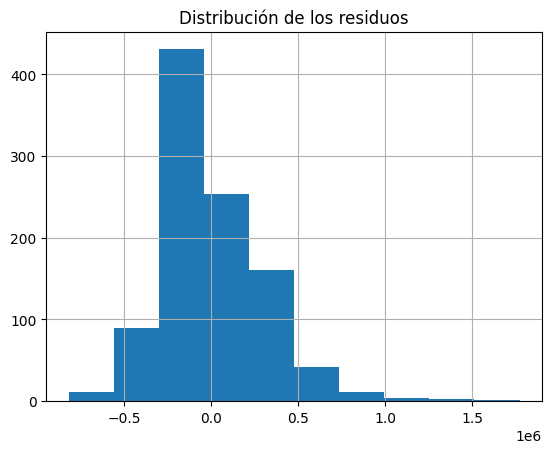

In [350]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [351]:
# definiendo la 'Y' prevista
y_predict= modelo_0.predict(X_test)

In [352]:
# importando el r2_score
from sklearn.metrics import r2_score

In [353]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación R² para el modelo con los datos de prueba es de: {round(r2_score(y_test,y_predict),2)}')

El coeficiente de determinación R² para el modelo con los datos de prueba es de: 0.39


# Hazlo como yo lo hice: analizando la variable respuesta

Durante esta clase, nos enfocamos en analizar el comportamiento de la variable respuesta, es decir, comprender el precio de venta de la casa.

Para esto, hicimos un histograma como recurso visual para facilitar este análisis.

*sns.displot(dados['precio_de_venta'], kde=True, color='green')*
*plt.title('Distribución del precio de venta')*
*plt.show()*


En esta actividad, aplica la función displot de la biblioteca Seaborn (sns) y explora los aspectos de la visualización de datos. Para ello, utiliza tus conocimientos adquiridos hasta el momento y desarrolla tus habilidades aún más.

Esta función se usa para crear un gráfico de distribución. El parámetro kde=True indica que queremos trazar la densidad de kernel estimada sobre el histograma. A través de este ejercicio práctico, tendrás la posibilidad de visualizar la forma de la distribución con más suavidad.

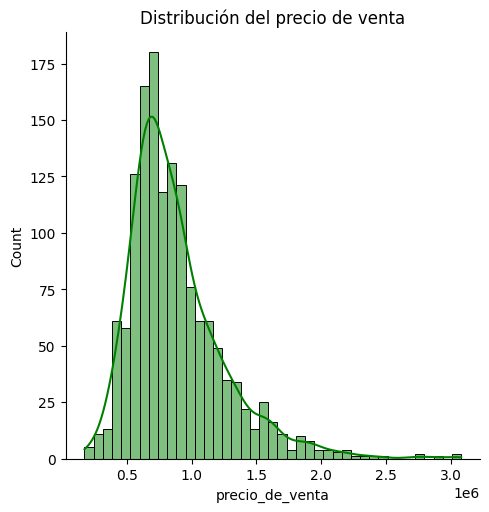

In [354]:
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de venta')
plt.show()

# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

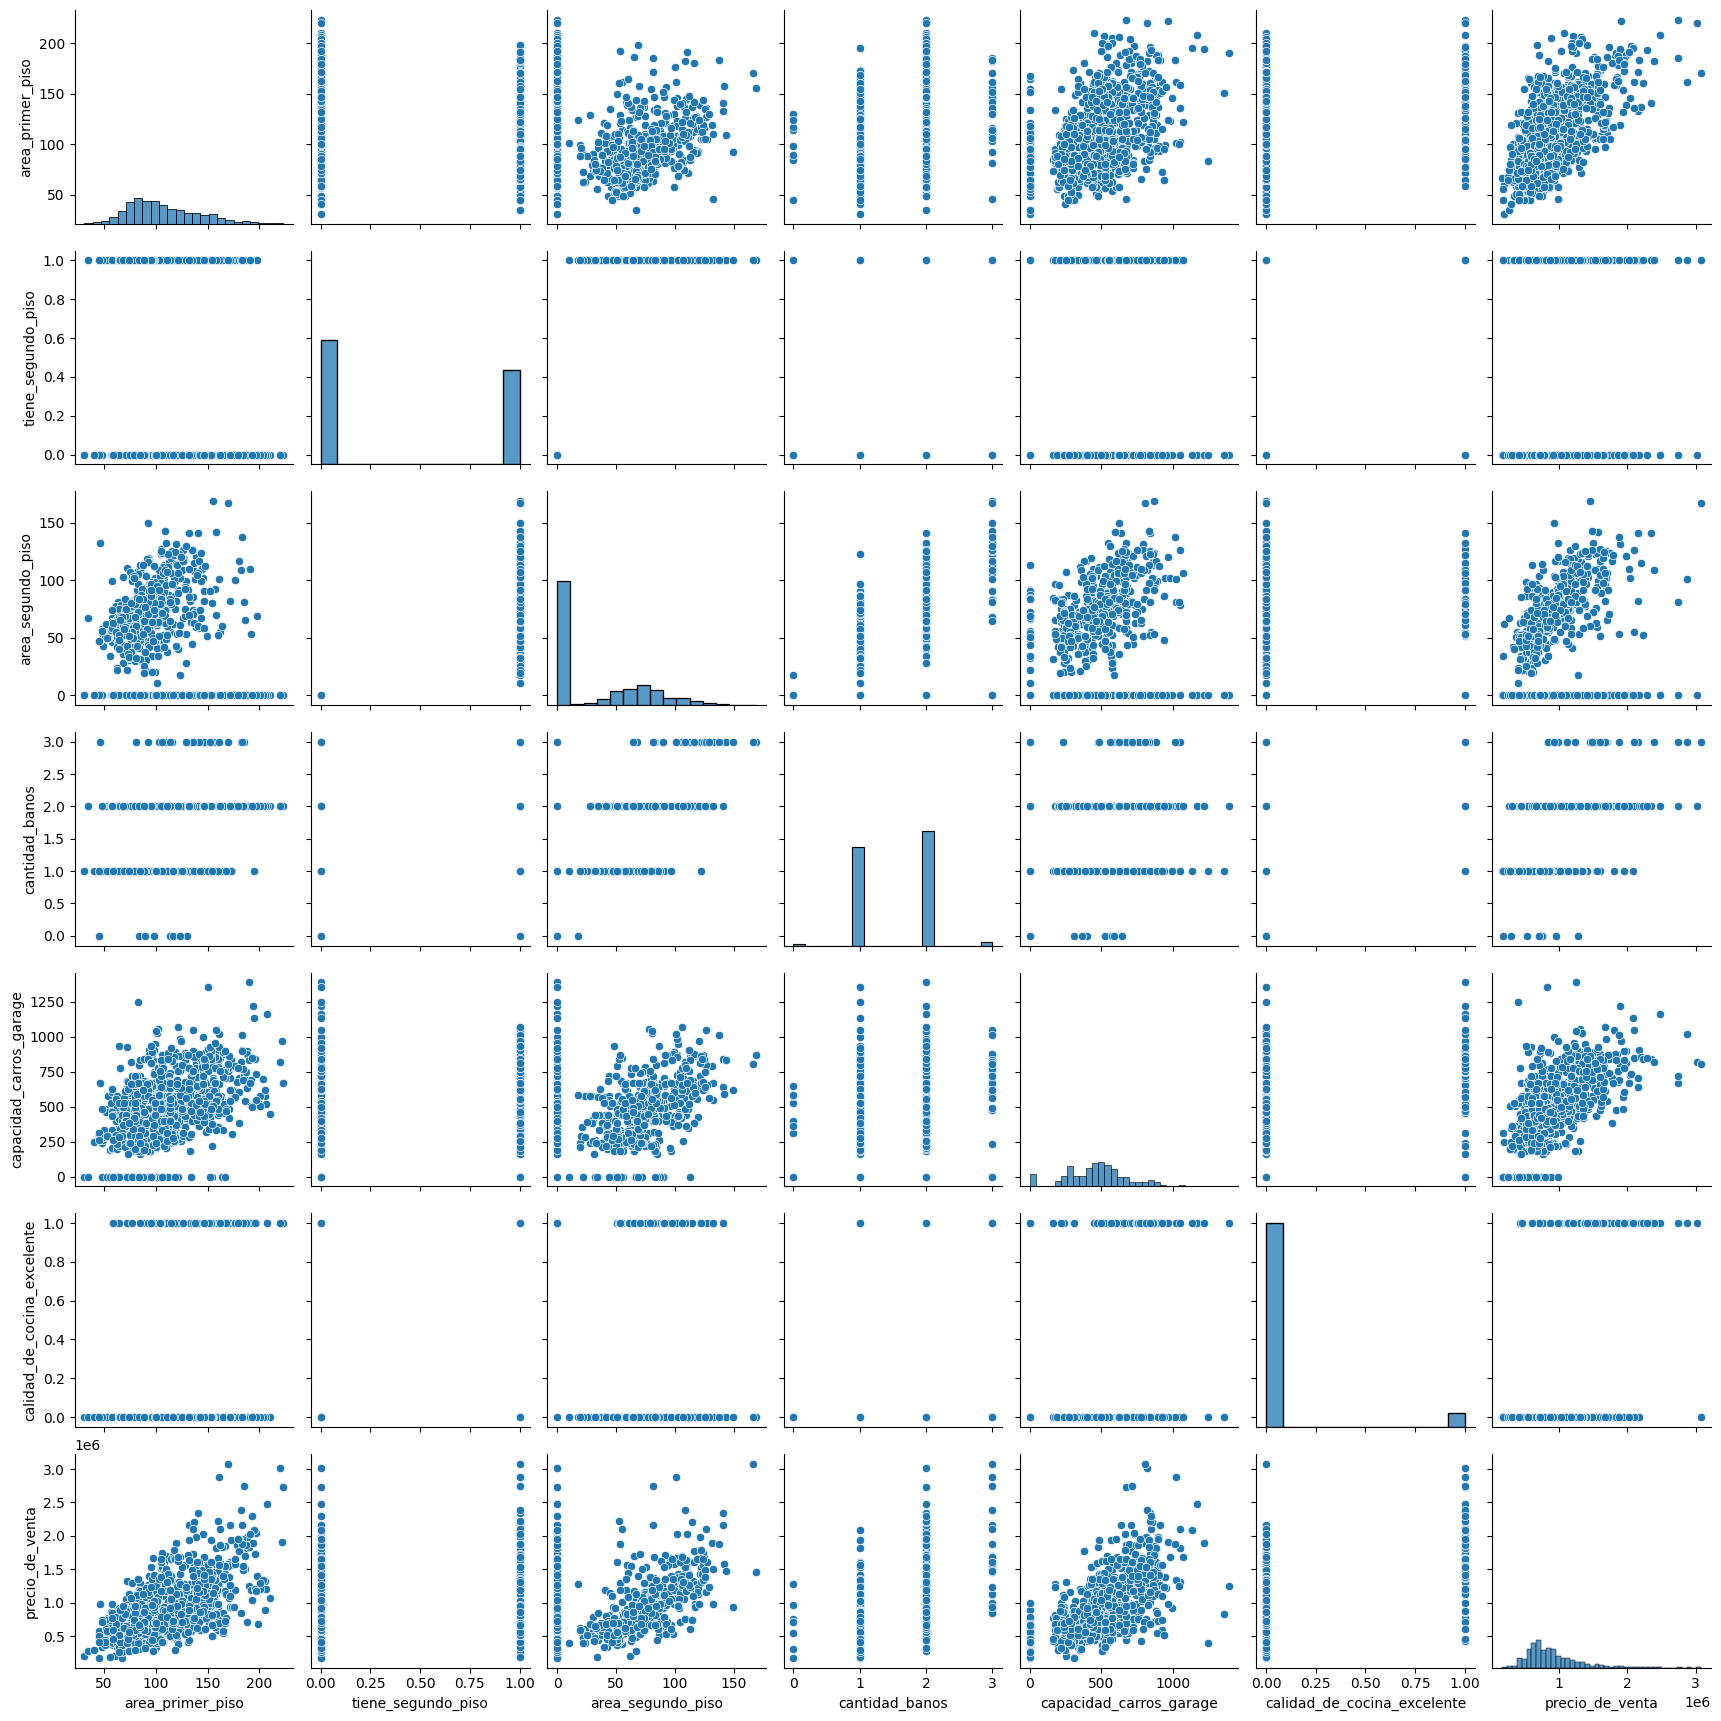

In [355]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

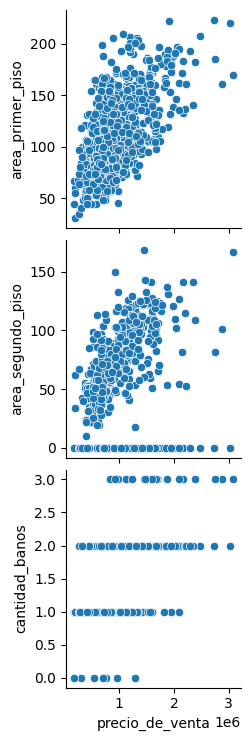

In [356]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos,y_vars=['area_primer_piso','area_segundo_piso','cantidad_banos'],x_vars='precio_de_venta')

## Añadiendo factores al modelo

In [357]:
# importando la api de statsmodels
import statsmodels.api as sm

In [358]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [359]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [360]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                  'cantidad_banos', 'capacidad_carros_garage',
                                  'calidad_de_cocina_excelente']]).fit()

In [361]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train,X_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                  'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [362]:
# Resumen del modelos
modelos = [modelo_0,modelo_1,modelo_2,modelo_3]

for i,j in enumerate(modelos):
  print(f'**************************************************************************\n*************** El modelo {i} tiene el siguiente resumen *******************\n**************************************************************************')
  print(j.summary(),'\n\n')

**************************************************************************
*************** El modelo 0 tiene el siguiente resumen *******************
**************************************************************************
                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          2.22e-105
Time:                        15:36:37   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                           

In [363]:
for i,j in enumerate(modelos):
  print(f'El coeficiente de determinación R² del modelo {i}: {j.rsquared.round(2)}')

El coeficiente de determinación R² del modelo 0: 0.38
El coeficiente de determinación R² del modelo 1: 0.74
El coeficiente de determinación R² del modelo 2: 0.71
El coeficiente de determinación R² del modelo 3: 0.65


## Comparando los modelos
Cuál es el modelo?


In [364]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# Manos a la obra: análisis y selección de modelos de regresión lineal


Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset:

https://gist.githubusercontent.com/ahcamachod/22ee402462306e4ee55032e833104929/raw/86234a227db3e0b3456d14be604841ba3fcf3203/hoteles.csv

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:


1.   análisis inicial con el PairPlot de Seaborn;
2.   construir modelos de regresión lineal;
3.   realizar la comparación de estos modelos.


Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [365]:
import pandas as pd

df1 = pd.read_csv('https://gist.githubusercontent.com/ahcamachod/22ee402462306e4ee55032e833104929/raw/86234a227db3e0b3456d14be604841ba3fcf3203/hoteles.csv')

df1.head()


,Estrellas,CercaniaTurismo,Capacidad,Precio
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## Paso 1: Análisis con PairPlot

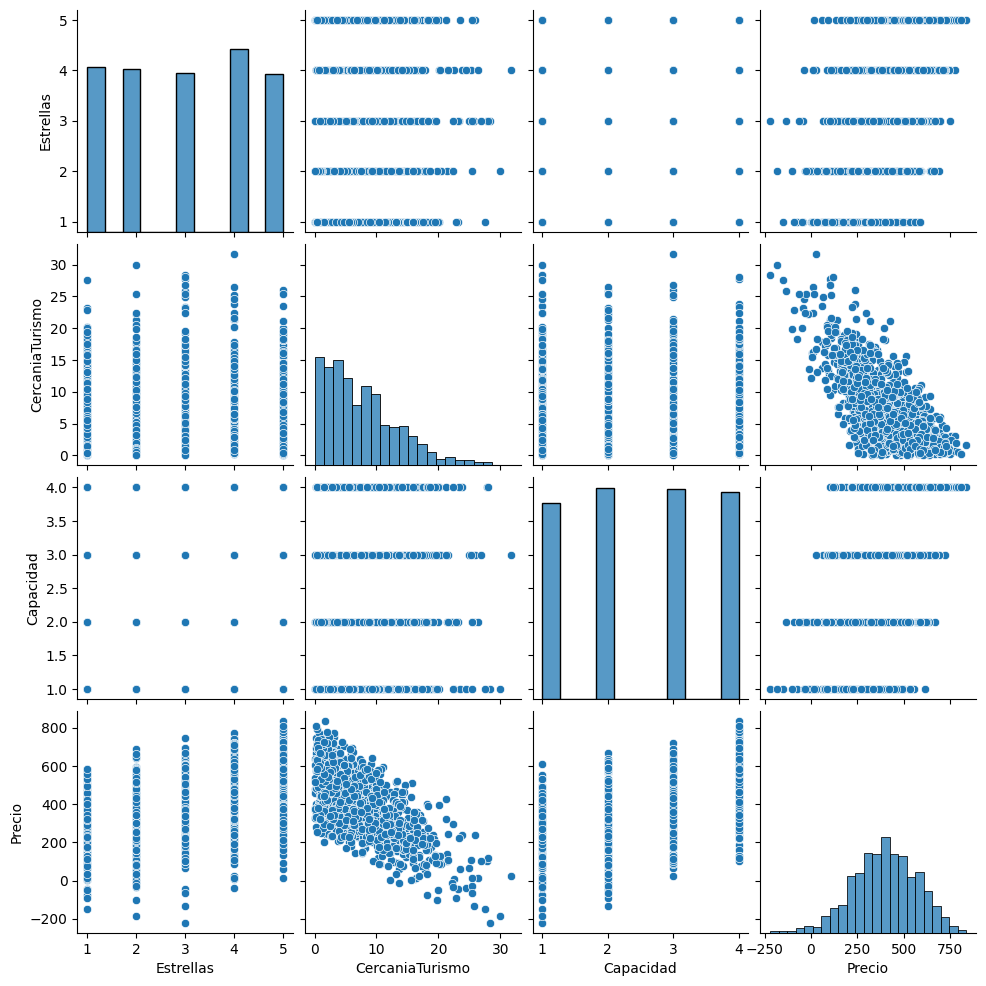

In [366]:
import seaborn as sns

sns.pairplot(df1)

## Paso 2: Construcción de modelos con regresión lineal


In [367]:
import statsmodels.api as sm


In [368]:
# Modelo 1: Utilizando únicamente 'Estrellas'
X1_a = df1[['Estrellas']]
X1_a = sm.add_constant(X1_a)  # Adicionando a constante
y_a = df1['Precio']
modelo_1_a = sm.OLS(y_a, X1_a).fit()

# Modelo 2: Utilizando 'Estrellas' e 'CercaniaTurismo'
X2_a = df1[['Estrellas', 'CercaniaTurismo']]
X2_a = sm.add_constant(X2_a)
modelo_2_a = sm.OLS(y_a, X2_a).fit()

# Modelo 3: Utilizando 'Estrellas', 'CercaniaTurismo' e 'Capacidade'
X3_a = df1[['Estrellas', 'CercaniaTurismo', 'Capacidad']]
X3_a = sm.add_constant(X3_a)
modelo_3_a = sm.OLS(y_a, X3_a).fit()


## Paso 3: Comparación de modelos

In [369]:
print("Modelo 1 - Solo 'Estrellas':")
print(modelo_1_a.summary())
print("\nModelo 2 - 'Estrellas' e 'CercaniaTurismo':")
print(modelo_2_a.summary())
print("\nModelo 3 - 'Estrellas', 'CercaniaTurismo' e 'Capacidad':")
print(modelo_3_a.summary())

Modelo 1 - Solo 'Estrellas':
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           6.09e-40
Time:                        15:36:40   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517  

# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [370]:
# Añadiendo una constante en X_test
X_test = sm.add_constant(X_test)
X_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [371]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(X_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
                                       'cantidad_banos', 'calidad_de_cocina_excelente']])

In [372]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la base de previsión es: {modelo_3.rsquared.round(2)}')

El coeficiente R² de la base de previsión es: 0.65


In [373]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R² con respecto a la base de entrenamiento es: {round(r2_score(y_test,prevision_3),2)}')

El coeficiente R² con respecto a la base de entrenamiento es: 0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [374]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [375]:
#Nuevo inmueble
nuevo_inmueble = pd.DataFrame({
    'const':[1],
    'area_primer_piso':[120],
    'tiene_segundo_piso':[1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0]
})

In [376]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [377]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [378]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [379]:
# Leyendo varias casas?
nuevas_casas = pd.read_csv('/content/nuevas_casas.csv',sep=';')
nuevas_casas.head(2)

,Casa,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente
0,1,150,1,2,1
1,2,180,0,3,1


In [380]:
nuevas_casas.drop(columns='Casa',inplace=True)

In [381]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)

In [382]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()
nuevas_casas['Precio de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

,const,area_primer_piso,tiene_segundo_piso,cantidad_banos,calidad_de_cocina_excelente,Precio de Venta
0,1.0,150,1,2,1,1751739.07
1,1.0,180,0,3,1,1863057.99
2,1.0,120,1,2,1,1568149.47
3,1.0,200,1,3,1,2206758.02
4,1.0,160,0,2,1,1591628.64
5,1.0,140,1,2,0,1246151.31
6,1.0,170,0,3,0,1357470.23
7,1.0,190,1,2,0,1552133.97
8,1.0,130,0,2,0,963647.81
9,1.0,180,1,3,0,1639973.72


# Manos a la obra: estimando el valor de una casa

Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

*   1 baño
*   Área 98m²
*   No tiene segundo piso
*   Calidad de la cocina excelente

![texto del vínculo](http://cdn3.gnarususercontent.com.br/2145-data-science-probando-relaciones-con-regresion-lineal/Imagenes/7.HagaLoQueHicimos.png)

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.




In [383]:
"""
Para realizar la tasación de una casa con estas características,
primero necesitamos crear un DataFrame con cada una de las informaciones,
almacenando en una variable nuevo_inmueble.
Este DataFrame necesita la información de constante 1 para que se pueda hacer la predicción con statsmodels:
"""

nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso':[98],
                               'existe_segundo_piso': [0],
                               'cantidad_baños': [1],
                               'calidad_de_la_cocina_Excelente': [1]
                               })


In [384]:
"""
Si deseamos utilizar un modelo más simplificado,
podemos hacer la predicción solo con la información del área de la casa, a partir del modelo_0:
"""

modelo_0.predict(nuevo_inmueble['area_primer_piso'])

,0
0,818686.169194


In [385]:
"""
Pero si queremos un modelo que tenga en cuenta todas las características disponibles, podemos usar el modelo_3:
"""

modelo_3.predict(nuevo_inmueble)[0]

np.float64(1063173.8519646404)

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [386]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [387]:
explicativas_1 = ['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'capacidad_carros_garage',
                  'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
                  'cantidad_banos', 'calidad_de_cocina_excelente']


In [388]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1["variables"] = explicativas_1
vif_1["vif"] = [vif(X_train[explicativas_1], i) for i in range(len(explicativas_1))]
vif_1

,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [389]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3["variables"] = explicativas_3
vif_3["vif"] = [vif(X_train[explicativas_3], i) for i in range(len(explicativas_3))]
vif_3

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [390]:
# Previsión de los valores de entrenamiento X_train[explicativas_3]
y_previsto_train = modelo_3.predict(X_train[explicativas_3])

In [391]:
# Generando un scatter plot entre y_previsto e y_Train
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsión vs Real',
                 labels={'x':'Precio previsto','y':'Precio real'})
fig.show()

In [392]:
# Residuos
residuos = modelo_3.resid
fig = px.scatter(x=y_previsto_train, y=residuos,
                 title='Previsión vs Residuos',
                 labels={'x':'Precio previsto','y':'Residuos'})
fig.show()

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">

# Manos a la obra: ajustando un modelo para la planta

En esta actividad, vamos a aplicar los conceptos de multicolinealidad y homocedasticidad en un contexto diferente: el sector de energía. Utilizaremos este dataset de una planta de energía para explorar cómo estos conceptos pueden afectar nuestros modelos de regresión. ¡Vamos!

https://gist.githubusercontent.com/ahcamachod/b3ff0c90b9679ec5d47690528d17caca/raw/702619a4794755ba88951510c67bf0a2f5a5fa53/planta_de_energia.csv

Tu tarea implica llevar a cabo las siguientes etapas:

Primera etapa: Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

Segunda etapa: Realiza un análisis de residuos e identifica si hay o no heterocedasticidad en los datos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [414]:
import pandas as pd
from sklearn.model_selection import train_test_split

df2 = pd.read_csv('https://gist.githubusercontent.com/ahcamachod/b3ff0c90b9679ec5d47690528d17caca/raw/702619a4794755ba88951510c67bf0a2f5a5fa53/planta_de_energia.csv')

df2.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [415]:
y = df2['PE']
X = df2.drop(columns=['PE'])

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [417]:
import statsmodels.api as sm


In [418]:
#añadiendo la constante
X_train= sm.add_constant(X_train)

In [423]:
modelo = sm.OLS(y_train,X_train).fit()

In [424]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Sat, 21 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:47:16   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.000     423.033     469.175
AT            -1.9607      0.018   -106.991      0.000      -1.997      -1.925
V             -0.2413      0.009    -27.670      0.000      -0.258      -0.224
AP             0.0702      0.011      6.152      0.000       0.048       0.093
RH            -0.1537      0.005    -30.823      0.000      -0.163      -0.144
==============================================================================
Omnibus:                      481.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.892
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicolinearidad


In [428]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [429]:
vif_1 = pd.DataFrame()
explicativas = ['const','AT','V','AP','RH']
vif_1["variable"] = explicativas

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas].values, i)
                          for i in range(len(explicativas))]

print(vif_1)

  variable           vif
0    const  44603.788615
1       AT      6.034363
2        V      3.954998
3       AP      1.468530
4       RH      1.717508


Los resultados obtenidos se refieren al cálculo del Factor de Inflación de la Varianza (VIF, del inglés Variance Inflation Factor), que es una métrica utilizada para cuantificar el grado de multicolinealidad en un modelo de regresión lineal. El VIF proporciona una indicación de cuánto se incrementa la variación de un coeficiente de regresión debido a la multicolinealidad.

Aquí está una interpretación de los valores de VIF obtenidos para cada variable:

const: Este valor alto (44603.788615) para la constante (intercepto) generalmente no se interpreta en el contexto de multicolinealidad, ya que es simplemente un valor que ajusta la media de la respuesta cuando todas las variables predictoras son iguales a cero.

AT (Temperatura ambiente): El VIF de aproximadamente 6.03 indica una multicolinealidad moderada. Un VIF superior a 5 puede ser motivo de preocupación, sugiriendo que esta variable tiene una correlación lineal moderada con las otras variables independientes en el modelo.

V (Velocidad del viento): Con un VIF de aproximadamente 3.95, indica una multicolinealidad baja a moderada. Esto sugiere que hay alguna correlación con otras variables predictoras, pero no es extremadamente alta.

AP (Presión atmosférica): El VIF de aproximadamente 1.47 sugiere que hay poca multicolinealidad relacionada con esta variable, indicando que tiene una relación lineal relativamente baja con las otras variables predictoras.

RH (Humedad relativa): Un VIF de aproximadamente 1.72 también indica baja multicolinealidad, mostrando que esta variable tiene una pequeña correlación lineal con las otras variables en el modelo.

Interpretación General:

Valores de VIF por debajo de 5 generalmente indican una multicolinealidad baja, que es el caso para AP, V y RH.
Un VIF entre 5 y 10 (como el observado para AT) sugiere una multicolinealidad moderada, lo que puede o no ser motivo de preocupación, dependiendo del contexto específico del análisis.
Valores de VIF por encima de 10 indicarían una multicolinealidad alta, lo cual no se observó en este caso, excepto para la constante, que, como se mencionó, generalmente no se considera en el análisis de multicolinealidad.
En resumen, los resultados indican que, excepto por la temperatura ambiente (AT), las otras variables tienen un nivel aceptable de multicolinealidad en el modelo. La temperatura ambiente presenta un nivel moderado de multicolinealidad y puede requerir una investigación más detallada o una posible reformulación del modelo.

## Análisis de residuos


In [430]:
import plotly.express as px

In [431]:
y_previsto_train =  modelo.predict(X_train)

In [432]:
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsión vs Real',
                 labels={'x':'Precio previsto','y':'Precio real'})
fig.show()

In [433]:
# Residuos
residuos = modelo.resid

In [434]:
fig = px.scatter(x=y_previsto_train, y=residuos,
                 title='Previsión vs Residuos',
                 labels={'x':'Precio previsto','y':'Residuos'})
fig.show()